# ☕ Coffee Sales Analysis Project

**Duration**: March 2024 – July 2024  
**Tools**: Python, Pandas, Matplotlib, Seaborn

**Objective**: Analyze vending machine coffee sales data to identify high-revenue products, peak hours, and customer behavior.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
coffee_data = pd.read_csv('Coffe data set.csv')
coffee_data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


## 🔧 Data Preprocessing

In [2]:
# Convert date columns to datetime format
coffee_data['date'] = pd.to_datetime(coffee_data['date'])
coffee_data['datetime'] = pd.to_datetime(coffee_data['datetime'])

# Feature engineering
coffee_data['month'] = coffee_data['date'].dt.to_period('M').astype(str)
coffee_data['day'] = coffee_data['date'].dt.day_name()
coffee_data['hour'] = coffee_data['datetime'].dt.hour
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   month        1133 non-null   object        
 7   day          1133 non-null   object        
 8   hour         1133 non-null   int32         
dtypes: datetime64[ns](2), float64(1), int32(1), object(5)
memory usage: 75.4+ KB


## 📊 Revenue by Coffee Product

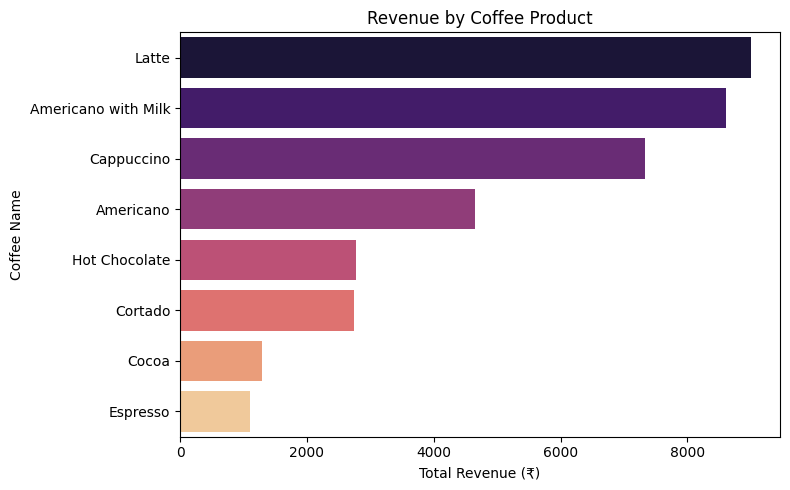

In [3]:
revenue_data = coffee_data.groupby('coffee_name')['money'].sum().reset_index()
revenue_data = revenue_data.sort_values(by='money', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=revenue_data, x='money', y='coffee_name', hue='coffee_name', palette='magma', legend=False)
plt.title('Revenue by Coffee Product')
plt.xlabel('Total Revenue (₹)')
plt.ylabel('Coffee Name')
plt.tight_layout()
plt.show()

## 🕒 Sales by Hour

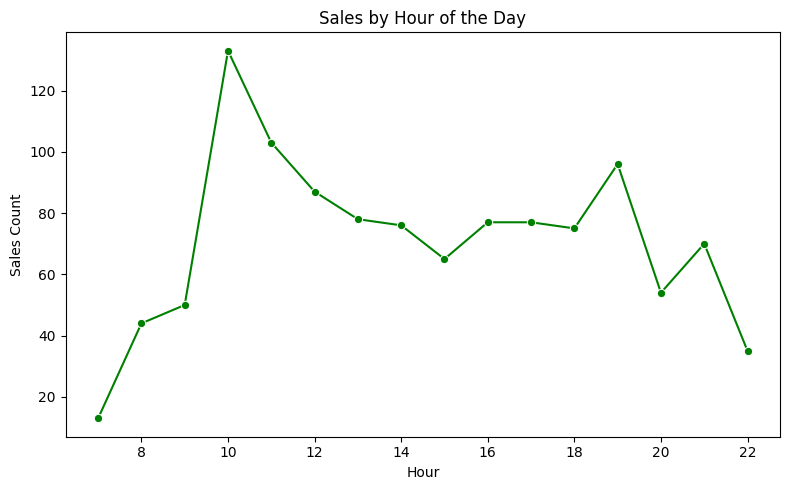

In [4]:
hourly_sales = coffee_data.groupby('hour').size().reset_index(name='count')

plt.figure(figsize=(8, 5))
sns.lineplot(data=hourly_sales, x='hour', y='count', marker='o', color='green')
plt.title('Sales by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Sales Count')
plt.tight_layout()
plt.show()

## 📅 Sales by Day of the Week

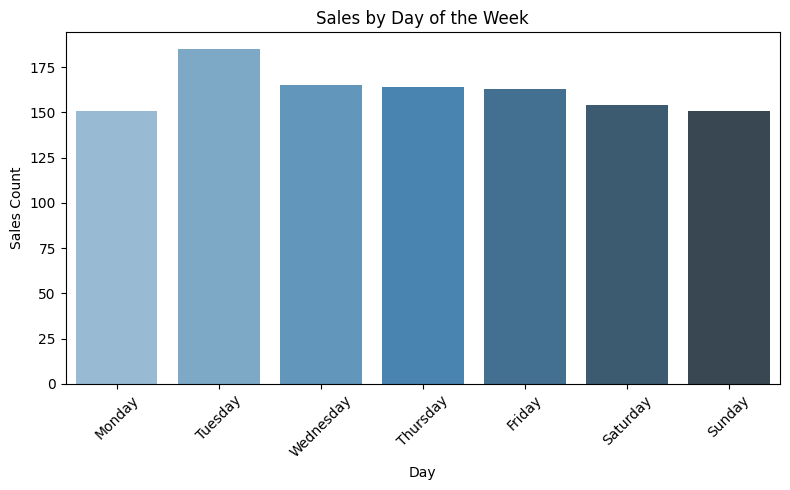

In [6]:
weekday_sales = coffee_data['day'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()
weekday_sales.columns = ['day', 'count']

plt.figure(figsize=(8, 5))
sns.barplot(data=weekday_sales, x='day', y='count',hue ='day', palette='Blues_d', legend=False)
plt.title('Sales by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📌 Final Summary & Conclusion

This project analyzed 1133 coffee vending machine transactions from March to July 2024.

**Key Insights:**
- ☕ Latte and Americano with Milk generated the highest revenue.
- 🕒 Peak sales hours were 10:00 AM and 7:00 PM.
- 📅 Tuesday had the most transactions.
- 💳 92% of users paid via card.

These insights help improve restocking, scheduling, and targeting coffee preferences effectively using data-driven decisions.